In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv


Step 1: Import Libraries & Load Data

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('/kaggle/input/customer-segmentation-tutorial-in-python/Mall_Customers.csv')
print(df.head())
print("Shape:", df.shape)
print(df.columns.tolist())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
Shape: (200, 5)
['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


Step 2: Preprocess & Prepare Features

In [15]:
# Inspect and select relevant features
print(df.info())
# We'll cluster based on 'Annual Income (k$)' and 'Spending Score (1–100)'
X = df[['Annual Income (k$)','Spending Score (1-100)']]

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


Find Optimal K via Elbow Method

/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

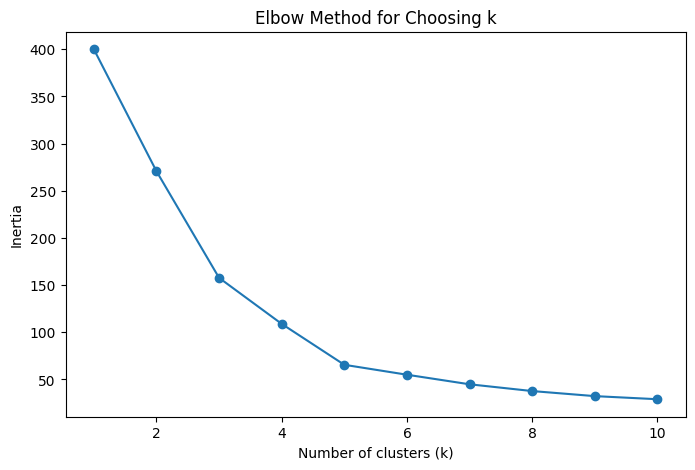

In [16]:
inertia = []
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(K, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Choosing k')
plt.show()


Step 4: Fit Final K-Means Model (e.g., k=5)

In [17]:
k_opt = 5  # choose based on elbow
kmeans = KMeans(n_clusters=k_opt, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

df['Cluster'] = clusters
sil_score = silhouette_score(X_scaled, clusters)
print("Silhouette Score:", sil_score)


Silhouette Score: 0.5546571631111091


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Step 5: Visualize Clusters

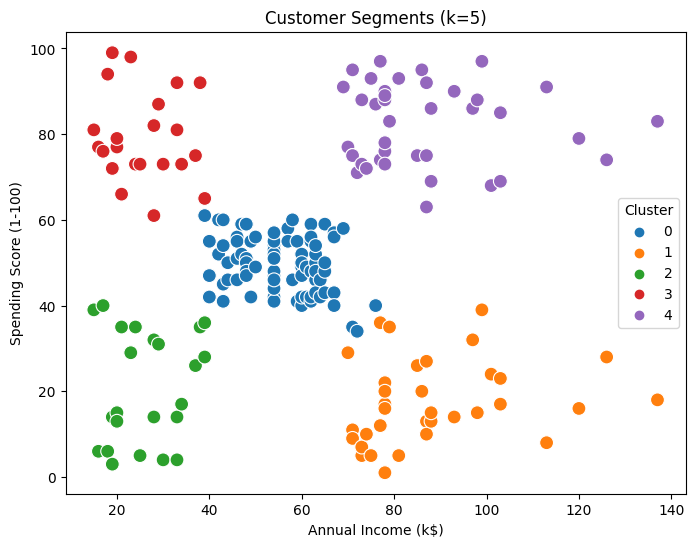

In [18]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
    hue='Cluster', palette='tab10', s=100
)
plt.title(f'Customer Segments (k={k_opt})')
plt.show()


Step 6: Cluster Profiling

   Cluster  Annual Income (k$)  Spending Score (1-100)
0        0           55.296296               49.518519
1        1           88.200000               17.114286
2        2           26.304348               20.913043
3        3           25.727273               79.363636
4        4           86.538462               82.128205


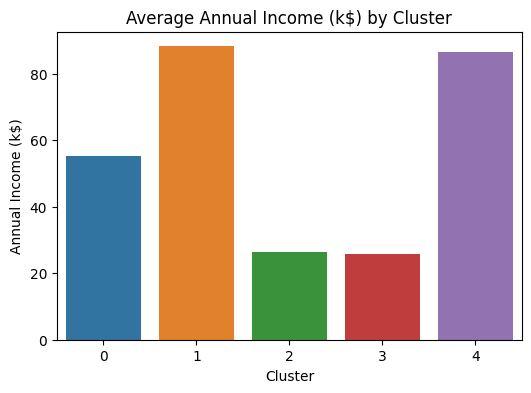

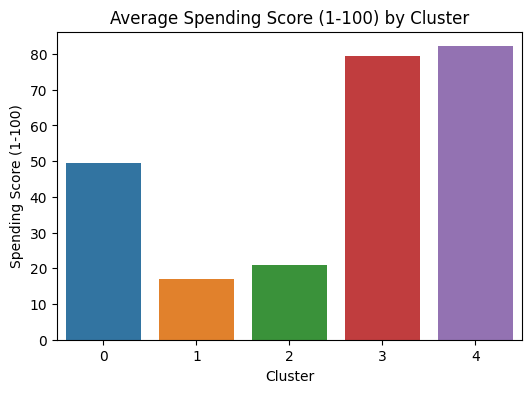

In [19]:
profile = df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean().reset_index()
print(profile)

for col in ['Annual Income (k$)', 'Spending Score (1-100)']:
    plt.figure(figsize=(6,4))
    sns.barplot(x='Cluster', y=col, data=profile, palette='tab10')
    plt.title(f'Average {col} by Cluster')
    plt.show()
